# Water Quality Prediction System Using Machine Learning Algorithms

## Importing Require Packages

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


## Reading Dataset

In [13]:
data= pd.read_csv(r"D:\Dataset.csv")

In [15]:
data

,Id,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,1,10.90,10.60,NaN,NaN,NaN,NaN,NaN,0.63,0.600,...,NaN,NaN,NaN,6.800,5.40,NaN,NaN,NaN,NaN,NaN
1,2,13.15,12.62,NaN,NaN,NaN,NaN,NaN,1.50,0.870,...,NaN,NaN,NaN,4.710,4.20,NaN,NaN,NaN,NaN,NaN
2,32,3.80,6.50,NaN,NaN,NaN,NaN,NaN,0.32,0.540,...,NaN,NaN,NaN,2.100,3.40,NaN,NaN,NaN,NaN,NaN
3,40,10.45,10.65,NaN,NaN,NaN,NaN,NaN,1.38,1.635,...,NaN,NaN,NaN,5.350,5.85,NaN,NaN,NaN,NaN,NaN
4,43,8.10,8.10,NaN,NaN,NaN,NaN,NaN,1.72,1.680,...,NaN,NaN,NaN,4.800,5.30,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,206,4.14,7.60,8.11,2.09,0.6,12.76,0.463,0.37,0.260,...,1.43,0.872,1.22,5.800,6.60,1.75,5.3,15.1,4.6,15.6
59,209,9.90,8.20,NaN,NaN,NaN,NaN,NaN,0.39,0.325,...,NaN,NaN,NaN,3.685,4.85,NaN,NaN,NaN,NaN,NaN
60,210,8.00,9.50,NaN,NaN,NaN,NaN,NaN,0.43,0.210,...,NaN,NaN,NaN,7.500,4.80,NaN,NaN,NaN,NaN,NaN
61,215,4.10,4.30,NaN,NaN,NaN,NaN,NaN,0.36,0.420,...,NaN,NaN,NaN,8.000,6.80,NaN,NaN,NaN,NaN,NaN


In [17]:
data.head()


,Id,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,1,10.90,10.60,NaN,NaN,NaN,NaN,NaN,0.63,0.600,...,NaN,NaN,NaN,6.80,5.40,NaN,NaN,NaN,NaN,NaN
1,2,13.15,12.62,NaN,NaN,NaN,NaN,NaN,1.50,0.870,...,NaN,NaN,NaN,4.71,4.20,NaN,NaN,NaN,NaN,NaN
2,32,3.80,6.50,NaN,NaN,NaN,NaN,NaN,0.32,0.540,...,NaN,NaN,NaN,2.10,3.40,NaN,NaN,NaN,NaN,NaN
3,40,10.45,10.65,NaN,NaN,NaN,NaN,NaN,1.38,1.635,...,NaN,NaN,NaN,5.35,5.85,NaN,NaN,NaN,NaN,NaN
4,43,8.10,8.10,NaN,NaN,NaN,NaN,NaN,1.72,1.680,...,NaN,NaN,NaN,4.80,5.30,NaN,NaN,NaN,NaN,NaN


In [19]:
data.tail()

,Id,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
58,206,4.14,7.6,8.11,2.09,0.6,12.76,0.463,0.37,0.260,...,1.43,0.872,1.22,5.800,6.60,1.75,5.3,15.1,4.6,15.6
59,209,9.90,8.2,NaN,NaN,NaN,NaN,NaN,0.39,0.325,...,NaN,NaN,NaN,3.685,4.85,NaN,NaN,NaN,NaN,NaN
60,210,8.00,9.5,NaN,NaN,NaN,NaN,NaN,0.43,0.210,...,NaN,NaN,NaN,7.500,4.80,NaN,NaN,NaN,NaN,NaN
61,215,4.10,4.3,NaN,NaN,NaN,NaN,NaN,0.36,0.420,...,NaN,NaN,NaN,8.000,6.80,NaN,NaN,NaN,NaN,NaN
62,216,9.70,9.1,NaN,NaN,NaN,NaN,NaN,0.35,0.300,...,NaN,NaN,NaN,4.000,5.00,NaN,NaN,NaN,NaN,NaN


In [21]:
data.describe()

,Id,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,63.000000,63.000000,63.000000,15.000000,15.000000,16.000000,14.000000,14.000000,63.000000,63.000000,...,16.000000,14.000000,14.000000,63.000000,63.000000,15.000000,15.000000,16.000000,14.000000,14.000000
mean,124.968254,8.675794,9.819921,9.882000,8.354667,6.629062,9.590714,7.607714,0.413307,0.434841,...,6.679688,4.652286,6.256786,5.223889,5.051376,4.439333,6.046667,7.562500,4.198571,5.190714
std,55.778643,2.988272,6.880399,3.844016,3.660164,3.262051,1.607169,3.606757,0.359051,0.409445,...,4.778864,4.242196,5.767541,1.906394,1.739672,2.060931,2.221575,4.526378,1.709340,4.079520
min,1.000000,3.420000,4.300000,0.000000,0.000000,0.000000,7.100000,0.463000,0.022000,0.023000,...,0.400000,0.872000,1.120000,0.620000,0.630000,1.750000,2.620000,3.300000,2.430000,1.300000
25%,84.500000,6.825000,6.600000,7.605000,7.250000,4.825000,8.900000,5.102500,0.233333,0.180000,...,2.885000,1.280000,1.697500,3.975000,4.000000,3.450000,4.880000,4.462500,2.862500,2.925000
50%,126.000000,8.300000,8.200000,10.760000,9.050000,7.900000,9.110000,8.215000,0.340000,0.290000,...,5.605000,4.050000,4.727500,4.800000,4.800000,4.050000,6.060000,5.735000,4.300000,4.215000
75%,176.000000,10.200000,10.583333,13.050000,10.490000,8.975000,10.550000,9.100000,0.455000,0.537500,...,9.262500,5.452500,8.932500,6.400000,6.050000,4.720000,6.700000,9.387500,4.675000,5.260000
max,216.000000,18.700000,54.000000,14.400000,13.400000,10.400000,12.760000,13.760000,1.720000,1.920000,...,17.600000,16.600000,19.500000,9.800000,11.100000,9.590000,11.600000,18.500000,9.200000,15.600000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      63 non-null     int64  
 1   O2_1    63 non-null     float64
 2   O2_2    63 non-null     float64
 3   O2_3    15 non-null     float64
 4   O2_4    15 non-null     float64
 5   O2_5    16 non-null     float64
 6   O2_6    14 non-null     float64
 7   O2_7    14 non-null     float64
 8   NH4_1   63 non-null     float64
 9   NH4_2   63 non-null     float64
 10  NH4_3   15 non-null     float64
 11  NH4_4   15 non-null     float64
 12  NH4_5   16 non-null     float64
 13  NH4_6   14 non-null     float64
 14  NH4_7   14 non-null     float64
 15  NO2_1   63 non-null     float64
 16  NO2_2   63 non-null     float64
 17  NO2_3   15 non-null     float64
 18  NO2_4   15 non-null     float64
 19  NO2_5   16 non-null     float64
 20  NO2_6   14 non-null     float64
 21  NO2_7   14 non-null     float64
 22  NO3_

In [27]:
data.isnull().sum()


Id         0
O2_1       0
O2_2       0
O2_3      48
O2_4      48
O2_5      47
O2_6      49
O2_7      49
NH4_1      0
NH4_2      0
NH4_3     48
NH4_4     48
NH4_5     47
NH4_6     49
NH4_7     49
NO2_1      0
NO2_2      0
NO2_3     48
NO2_4     48
NO2_5     47
NO2_6     49
NO2_7     49
NO3_1      0
NO3_2      0
NO3_3     48
NO3_4     48
NO3_5     47
NO3_6     49
NO3_7     49
BOD5_1     0
BOD5_2     0
BOD5_3    48
BOD5_4    48
BOD5_5    47
BOD5_6    49
BOD5_7    49
dtype: int64

In [31]:
data.fillna(data.mean(), inplace=True)  

In [33]:
data

,Id,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,1,10.90,10.60,9.882,8.354667,6.629062,9.590714,7.607714,0.63,0.600,...,6.679688,4.652286,6.256786,6.800,5.40,4.439333,6.046667,7.5625,4.198571,5.190714
1,2,13.15,12.62,9.882,8.354667,6.629062,9.590714,7.607714,1.50,0.870,...,6.679688,4.652286,6.256786,4.710,4.20,4.439333,6.046667,7.5625,4.198571,5.190714
2,32,3.80,6.50,9.882,8.354667,6.629062,9.590714,7.607714,0.32,0.540,...,6.679688,4.652286,6.256786,2.100,3.40,4.439333,6.046667,7.5625,4.198571,5.190714
3,40,10.45,10.65,9.882,8.354667,6.629062,9.590714,7.607714,1.38,1.635,...,6.679688,4.652286,6.256786,5.350,5.85,4.439333,6.046667,7.5625,4.198571,5.190714
4,43,8.10,8.10,9.882,8.354667,6.629062,9.590714,7.607714,1.72,1.680,...,6.679688,4.652286,6.256786,4.800,5.30,4.439333,6.046667,7.5625,4.198571,5.190714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,206,4.14,7.60,8.110,2.090000,0.600000,12.760000,0.463000,0.37,0.260,...,1.430000,0.872000,1.220000,5.800,6.60,1.750000,5.300000,15.1000,4.600000,15.600000
59,209,9.90,8.20,9.882,8.354667,6.629062,9.590714,7.607714,0.39,0.325,...,6.679688,4.652286,6.256786,3.685,4.85,4.439333,6.046667,7.5625,4.198571,5.190714
60,210,8.00,9.50,9.882,8.354667,6.629062,9.590714,7.607714,0.43,0.210,...,6.679688,4.652286,6.256786,7.500,4.80,4.439333,6.046667,7.5625,4.198571,5.190714
61,215,4.10,4.30,9.882,8.354667,6.629062,9.590714,7.607714,0.36,0.420,...,6.679688,4.652286,6.256786,8.000,6.80,4.439333,6.046667,7.5625,4.198571,5.190714


## Handle missinng Value

In [35]:
data.isnull().sum()

Id        0
O2_1      0
O2_2      0
O2_3      0
O2_4      0
O2_5      0
O2_6      0
O2_7      0
NH4_1     0
NH4_2     0
NH4_3     0
NH4_4     0
NH4_5     0
NH4_6     0
NH4_7     0
NO2_1     0
NO2_2     0
NO2_3     0
NO2_4     0
NO2_5     0
NO2_6     0
NO2_7     0
NO3_1     0
NO3_2     0
NO3_3     0
NO3_4     0
NO3_5     0
NO3_6     0
NO3_7     0
BOD5_1    0
BOD5_2    0
BOD5_3    0
BOD5_4    0
BOD5_5    0
BOD5_6    0
BOD5_7    0
dtype: int64

In [39]:
data.describe()

,Id,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,124.968254,8.675794,9.819921,9.882000,8.354667,6.629062,9.590714,7.607714,0.413307,0.434841,...,6.679688,4.652286,6.256786,5.223889,5.051376,4.439333,6.046667,7.562500,4.198571,5.190714
std,55.778643,2.988272,6.880399,1.826642,1.739277,1.604503,0.735931,1.651554,0.359051,0.409445,...,2.350577,1.942525,2.640989,1.906394,1.739672,0.979336,1.055672,2.226387,0.782716,1.868035
min,1.000000,3.420000,4.300000,0.000000,0.000000,0.000000,7.100000,0.463000,0.022000,0.023000,...,0.400000,0.872000,1.120000,0.620000,0.630000,1.750000,2.620000,3.300000,2.430000,1.300000
25%,84.500000,6.825000,6.600000,9.882000,8.354667,6.629062,9.590714,7.607714,0.233333,0.180000,...,6.679688,4.652286,6.256786,3.975000,4.000000,4.439333,6.046667,7.562500,4.198571,5.190714
50%,126.000000,8.300000,8.200000,9.882000,8.354667,6.629062,9.590714,7.607714,0.340000,0.290000,...,6.679688,4.652286,6.256786,4.800000,4.800000,4.439333,6.046667,7.562500,4.198571,5.190714
75%,176.000000,10.200000,10.583333,9.882000,8.354667,6.629062,9.590714,7.607714,0.455000,0.537500,...,6.679688,4.652286,6.256786,6.400000,6.050000,4.439333,6.046667,7.562500,4.198571,5.190714
max,216.000000,18.700000,54.000000,14.400000,13.400000,10.400000,12.760000,13.760000,1.720000,1.920000,...,17.600000,16.600000,19.500000,9.800000,11.100000,9.590000,11.600000,18.500000,9.200000,15.600000


## Data Preprocessing

In [46]:
data1 =data.drop(columns=['Id'])

In [48]:
data1

,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,10.90,10.60,9.882,8.354667,6.629062,9.590714,7.607714,0.63,0.600,1.5576,...,6.679688,4.652286,6.256786,6.800,5.40,4.439333,6.046667,7.5625,4.198571,5.190714
1,13.15,12.62,9.882,8.354667,6.629062,9.590714,7.607714,1.50,0.870,1.5576,...,6.679688,4.652286,6.256786,4.710,4.20,4.439333,6.046667,7.5625,4.198571,5.190714
2,3.80,6.50,9.882,8.354667,6.629062,9.590714,7.607714,0.32,0.540,1.5576,...,6.679688,4.652286,6.256786,2.100,3.40,4.439333,6.046667,7.5625,4.198571,5.190714
3,10.45,10.65,9.882,8.354667,6.629062,9.590714,7.607714,1.38,1.635,1.5576,...,6.679688,4.652286,6.256786,5.350,5.85,4.439333,6.046667,7.5625,4.198571,5.190714
4,8.10,8.10,9.882,8.354667,6.629062,9.590714,7.607714,1.72,1.680,1.5576,...,6.679688,4.652286,6.256786,4.800,5.30,4.439333,6.046667,7.5625,4.198571,5.190714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,4.14,7.60,8.110,2.090000,0.600000,12.760000,0.463000,0.37,0.260,0.7140,...,1.430000,0.872000,1.220000,5.800,6.60,1.750000,5.300000,15.1000,4.600000,15.600000
59,9.90,8.20,9.882,8.354667,6.629062,9.590714,7.607714,0.39,0.325,1.5576,...,6.679688,4.652286,6.256786,3.685,4.85,4.439333,6.046667,7.5625,4.198571,5.190714
60,8.00,9.50,9.882,8.354667,6.629062,9.590714,7.607714,0.43,0.210,1.5576,...,6.679688,4.652286,6.256786,7.500,4.80,4.439333,6.046667,7.5625,4.198571,5.190714
61,4.10,4.30,9.882,8.354667,6.629062,9.590714,7.607714,0.36,0.420,1.5576,...,6.679688,4.652286,6.256786,8.000,6.80,4.439333,6.046667,7.5625,4.198571,5.190714


In [97]:
print(data.isnull().sum())

data.fillna(data.mean(), inplace=True)

Id        0
O2_1      0
O2_2      0
O2_3      0
O2_4      0
O2_5      0
O2_6      0
O2_7      0
NH4_1     0
NH4_2     0
NH4_3     0
NH4_4     0
NH4_5     0
NH4_6     0
NH4_7     0
NO2_1     0
NO2_2     0
NO2_3     0
NO2_4     0
NO2_5     0
NO2_6     0
NO2_7     0
NO3_1     0
NO3_2     0
NO3_3     0
NO3_4     0
NO3_5     0
NO3_6     0
NO3_7     0
BOD5_1    0
BOD5_2    0
BOD5_3    0
BOD5_4    0
BOD5_5    0
BOD5_6    0
BOD5_7    0
dtype: int64


In [103]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [105]:
df_scaled 

,Id,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,-2.240356,0.750290,0.114288,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,0.608363,0.406613,...,0.0000,4.609015e-16,-1.356026e-15,0.833391,0.202006,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15
1,-2.222284,1.509282,0.410234,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,3.050877,1.071339,...,0.0000,4.609015e-16,-1.356026e-15,-0.271726,-0.493319,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15
2,-1.680123,-1.644749,-0.486394,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,-0.261958,0.258896,...,0.0000,4.609015e-16,-1.356026e-15,-1.651800,-0.956870,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15
3,-1.535547,0.598492,0.121613,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,2.713978,2.954732,...,0.0000,4.609015e-16,-1.356026e-15,0.066683,0.462753,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15
4,-1.481331,-0.194232,-0.251982,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,3.668524,3.065520,...,0.0000,4.609015e-16,-1.356026e-15,-0.224137,0.144062,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1.464407,-1.530057,-0.325236,-9.778782e-01,-3.630812e+00,-3.787771e+00,4.341087,-4.360804e+00,-0.121583,-0.430451,...,-2.2513,-1.961700e+00,-1.922478e+00,0.304627,0.897332,-2.768137e+00,-7.129713e-01,3.412724,5.169855e-01,5.617078e+00
59,1.518623,0.412961,-0.237331,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,-0.065434,-0.270424,...,0.0000,4.609015e-16,-1.356026e-15,-0.813709,-0.116685,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15
60,1.536695,-0.227965,-0.046871,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,0.046866,-0.553548,...,0.0000,4.609015e-16,-1.356026e-15,1.203525,-0.145657,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15
61,1.627055,-1.543550,-0.808712,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,-0.149658,-0.036538,...,0.0000,4.609015e-16,-1.356026e-15,1.467907,1.013219,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15


In [107]:
X = df_scaled.drop(columns=['BOD5_1'])  
y = df_scaled['BOD5_1']

In [109]:
X

,Id,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,-2.240356,0.750290,0.114288,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,0.608363,0.406613,...,6.760812e-16,0.0000,4.609015e-16,-1.356026e-15,0.202006,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15
1,-2.222284,1.509282,0.410234,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,3.050877,1.071339,...,6.760812e-16,0.0000,4.609015e-16,-1.356026e-15,-0.493319,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15
2,-1.680123,-1.644749,-0.486394,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,-0.261958,0.258896,...,6.760812e-16,0.0000,4.609015e-16,-1.356026e-15,-0.956870,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15
3,-1.535547,0.598492,0.121613,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,2.713978,2.954732,...,6.760812e-16,0.0000,4.609015e-16,-1.356026e-15,0.462753,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15
4,-1.481331,-0.194232,-0.251982,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,3.668524,3.065520,...,6.760812e-16,0.0000,4.609015e-16,-1.356026e-15,0.144062,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1.464407,-1.530057,-0.325236,-9.778782e-01,-3.630812e+00,-3.787771e+00,4.341087,-4.360804e+00,-0.121583,-0.430451,...,-1.793640e+00,-2.2513,-1.961700e+00,-1.922478e+00,0.897332,-2.768137e+00,-7.129713e-01,3.412724,5.169855e-01,5.617078e+00
59,1.518623,0.412961,-0.237331,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,-0.065434,-0.270424,...,6.760812e-16,0.0000,4.609015e-16,-1.356026e-15,-0.116685,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15
60,1.536695,-0.227965,-0.046871,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,0.046866,-0.553548,...,6.760812e-16,0.0000,4.609015e-16,-1.356026e-15,-0.145657,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15
61,1.627055,-1.543550,-0.808712,2.940848e-15,1.029523e-15,1.674000e-15,0.000000,-5.421031e-16,-0.149658,-0.036538,...,6.760812e-16,0.0000,4.609015e-16,-1.356026e-15,1.013219,2.742612e-15,-1.696194e-15,0.000000,1.143853e-15,-1.917122e-15


In [113]:
y

0     0.833391
1    -0.271726
2    -1.651800
3     0.066683
4    -0.224137
        ...   
58    0.304627
59   -0.813709
60    1.203525
61    1.467907
62   -0.647148
Name: BOD5_1, Length: 63, dtype: float64

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [119]:
y_pred = model.predict(X_test)

In [121]:
y_pred

array([ 0.61637798,  1.22142771,  0.07727394,  1.86787573, -0.39105353,
       -2.40907641, -2.62469633, -2.92344152, -0.73927918,  0.16232748,
        0.49323706, -4.93791816, -1.51671529])

In [123]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 4.387366217260906
R-squared: -4.235118175968276


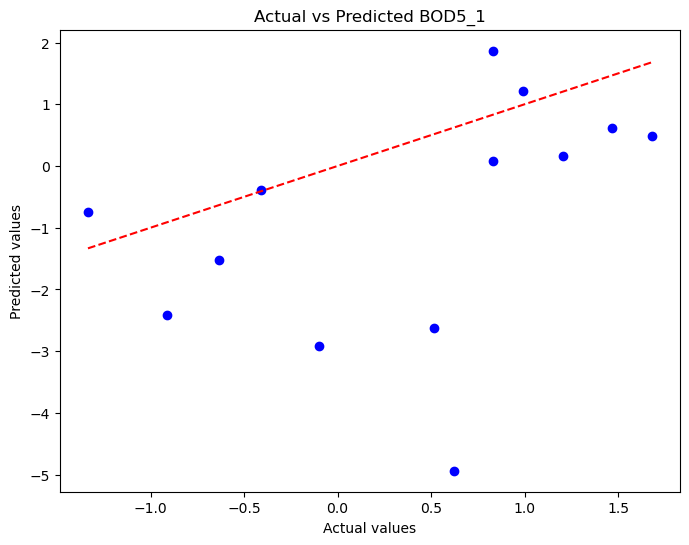

In [125]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted BOD5_1')
plt.show()


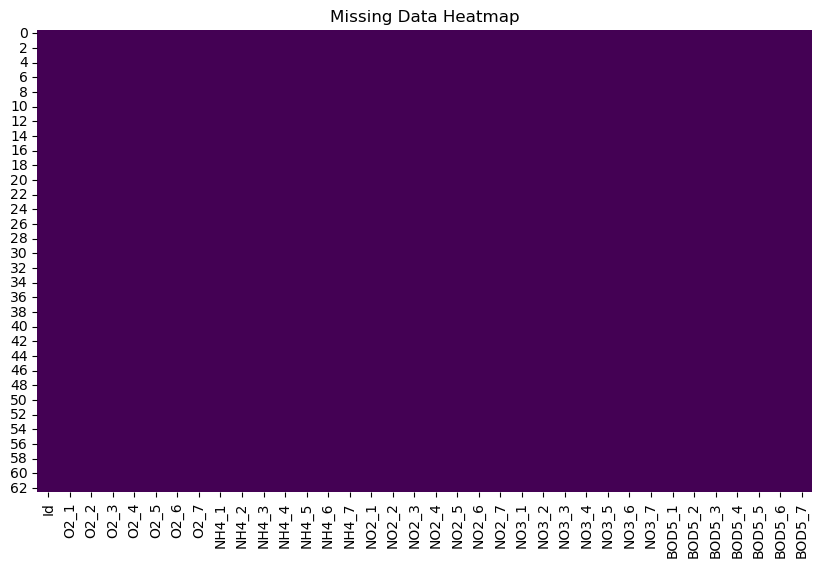

In [129]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


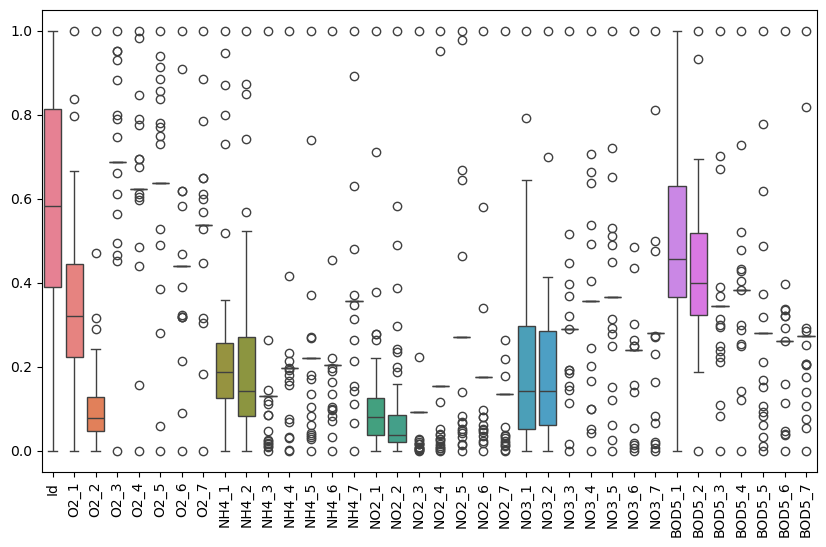

In [58]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=caled)
plt.xticks(rotation=90)
plt.show()

## Correlation Analysis

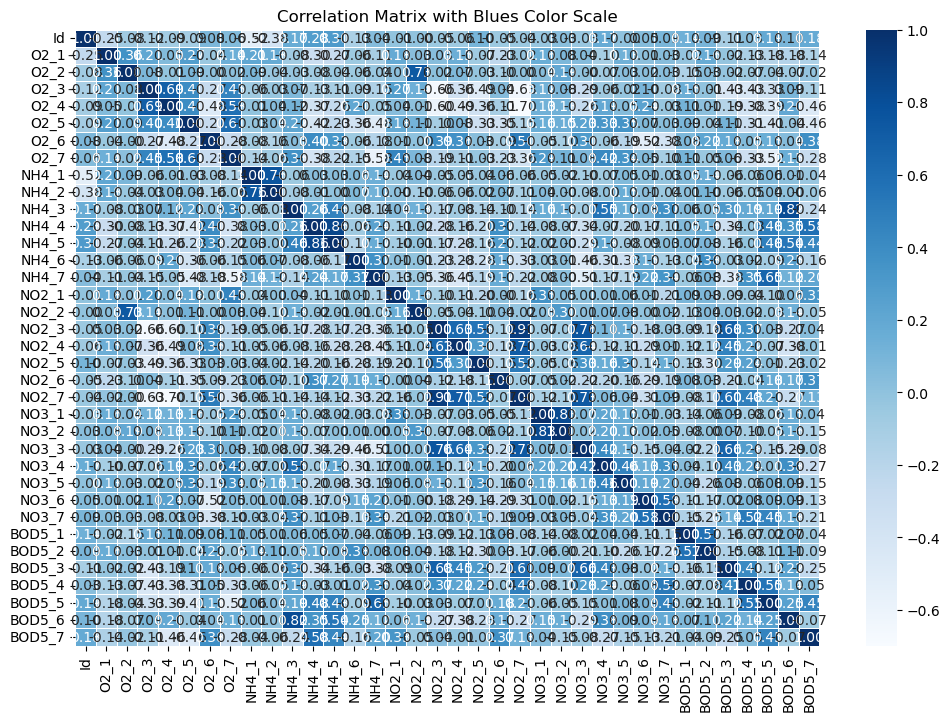

In [165]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Blues Color Scale')
plt.show()


In [65]:
corr_matrix['BOD5_1'].sort_values(ascending=False)

BOD5_1    1.000000
BOD5_2    0.572438
O2_3      0.149713
Id        0.137047
O2_4      0.111945
O2_7      0.108329
O2_5      0.086935
NO2_1     0.085761
NO2_6     0.080144
O2_6      0.075993
BOD5_6    0.072880
NH4_5     0.069295
NH4_3     0.063519
NH4_4     0.052255
NH4_1     0.051360
NO3_5     0.039416
NO3_4     0.035539
NH4_2     0.006330
O2_1     -0.021215
NO3_3    -0.024163
BOD5_5   -0.024724
NH4_6    -0.038190
BOD5_7   -0.043063
NH4_7    -0.060186
BOD5_4   -0.073544
NO2_7    -0.076238
NO3_2    -0.081570
NO2_3    -0.091148
NO3_6    -0.108498
NO2_4    -0.118427
NO2_2    -0.127702
NO2_5    -0.131462
NO3_1    -0.140965
O2_2     -0.148883
NO3_7    -0.153965
BOD5_3   -0.155758
Name: BOD5_1, dtype: float64

 ## Model Building

In [70]:
X = caled.drop(columns=['BOD5_1'])  # Features
y = caled['BOD5_1']

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Evaluate the Model

In [77]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.039225077702843704
R-squared: -0.10279665835018603


## Model Improvement


In [169]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)


print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.023526703447389902


In [82]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
 

Cross-validation scores: [-0.2168328   0.17920226 -0.12138807  0.25792223 -0.04452872]


In [175]:
import joblib

# Save the model
joblib.dump(model, 'water_quality_model.pkl')

# Load the model (when needed)
model = joblib.load('water_quality_model.pkl')
